In [463]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
from sklearn import datasets
from xgboost  import XGBClassifier
from sklearn.metrics import accuracy_score

In [480]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain','capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [324]:
#test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)
#test_set.columns = col_labels
#test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [481]:
print(train_set.shape)
#print(test_set.shape)

(32561, 15)


In [482]:
train_set.info()
#test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [483]:
train_set.describe()
#test_set.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Our work will be divided into 3 parts. Processing the data set, so it can be adequated for us to work with, Select the best features of the model, and Tunning the XGB model

In [484]:
test_set.head(2)

,age,workclass,fnlwgt,education_num,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,3,226802,7,4,6,2,1,0,0,40,37,0
1,38,3,89814,9,2,4,4,1,0,0,50,37,0


In [329]:
#print('test dataset shape',test_set.shape)
#print(test_set.workclass[test_set.workclass==' ?'].count())
#Out of  total 16281 rows 963 workclass feature has ? sign      
#print(test_set[test_set.workclass==' ?'].shape)

test dataset shape (16281, 15)
963
(963, 15)


In [486]:
#est_set[test_set == ' ?'].count()
# in Workclass, occupation and native_country column has ? sign so we will replace with NaN values

In [485]:
#est_set[test_set==' ?'] = np.nan
#est_set[test_set == ' ?'].count()
#Now we have replace ? with Nan 

In [487]:
#test_set.isna().sum()

In [488]:
train_set[train_set == ' ?'].count()
# we will do same replace ment train dataset
train_set[train_set==' ?'] = np.nan
train_set[train_set == ' ?'].count()

C:\Users\Jagdish\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [489]:
#print(test_set.wage_class.unique())
print(train_set.wage_class.unique())

[' <=50K' ' >50K']


In [490]:
#replace wageclass value with 0 and 1 in training dataset
train_set['wage_class'] =  train_set['wage_class'].map({' <=50K':0, ' >50K':1})
#replace wageclass value with 0 and 1 in testing dataset
#test_set['wage_class'] =  test_set['wage_class'].map({' <=50K.':0, ' >50K.':1})

In [491]:
train_set.head(2)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0


In [492]:
train_set.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
wage_class           0
dtype: int64

In [338]:
#We have nan value in train and test dataset so first we will handle this.

In [493]:
train_set.workclass.value_counts()
#test_set.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

Private has more count

In [494]:
train_set.occupation.value_counts()
#test_set.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [495]:
train_set.native_country.value_counts()
#test_set.native_country.value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

workclass, occupation and native.country contain missing values. All of these variables are categorical data type. So, I will impute the missing values with the most frequent value- the mode.

In [496]:

print('MOre count of value in workclass feature in train dataset is')
print(train_set['workclass'].mode())
print('-'*60)

print('MOre count of value in occupation feature in train dataset is')
print(train_set['occupation'].mode())
print('-'*60)

print('MOre count of value in native_country feature in train dataset is')
print(train_set['native_country'].mode())
print('-'*100)

#print('MOre count of value in workclass feature in test dataset is')
#print(test_set['workclass'].mode())
#print('-'*60)
#print('MOre count of value in occupation feature in test dataset is')
#print(test_set['occupation'].mode())
#print('-'*60)
#print('MOre count of value in native_country feature in test dataset is')
#print(test_set['native_country'].mode())
#print('-'*100)

MOre count of value in workclass feature in train dataset is
0     Private
dtype: object
------------------------------------------------------------
MOre count of value in occupation feature in train dataset is
0     Prof-specialty
dtype: object
------------------------------------------------------------
MOre count of value in native_country feature in train dataset is
0     United-States
dtype: object
----------------------------------------------------------------------------------------------------


In [497]:
for col in ['workclass', 'occupation', 'native_country']:train_set[col].fillna(train_set[col].mode()[0], inplace=True)
#for col in ['workclass', 'occupation', 'native_country']:test_set[col].fillna(test_set[col].mode()[0], inplace=True)

In [498]:
train_set.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [499]:
train_set.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0


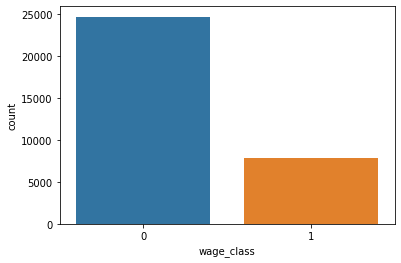

In [500]:
sns.countplot(train_set['wage_class'])

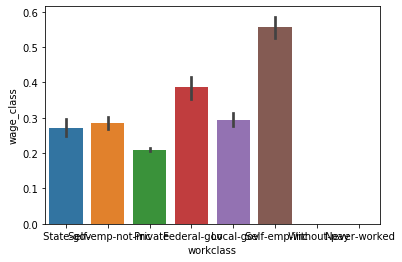

In [414]:
g = sns.barplot(x='workclass' , y ='wage_class', data= train_set)


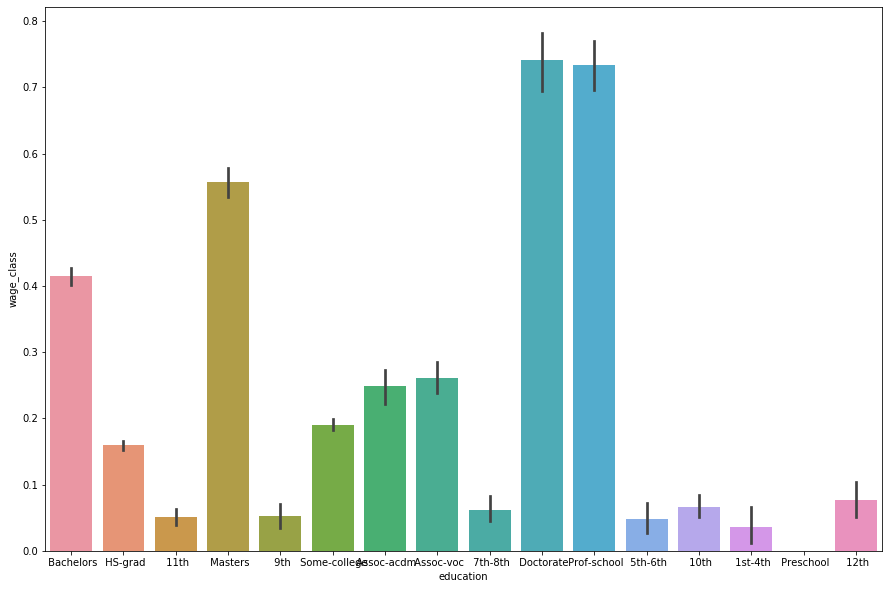

In [421]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.barplot(x='education' , y ='wage_class', data= train_set)


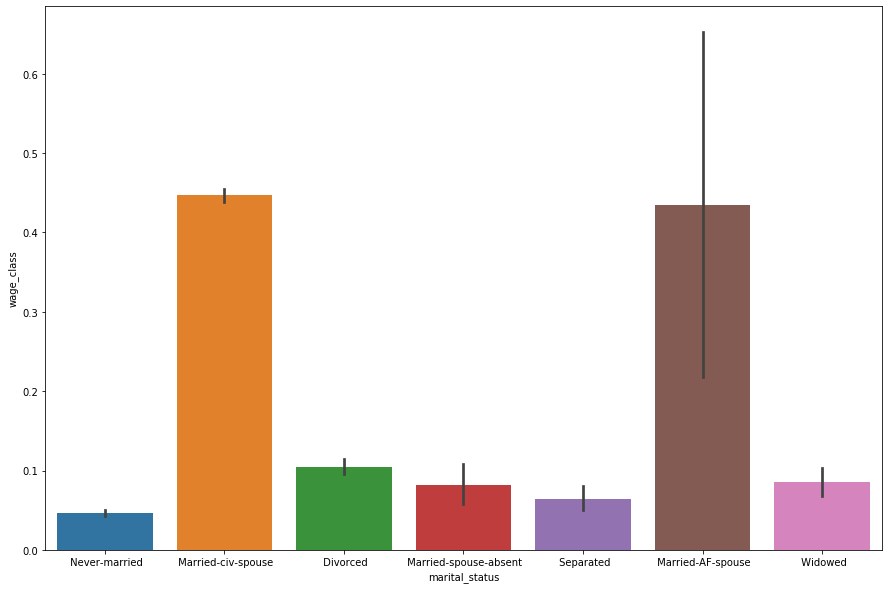

In [422]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.barplot(x='marital_status' , y ='wage_class', data= train_set)

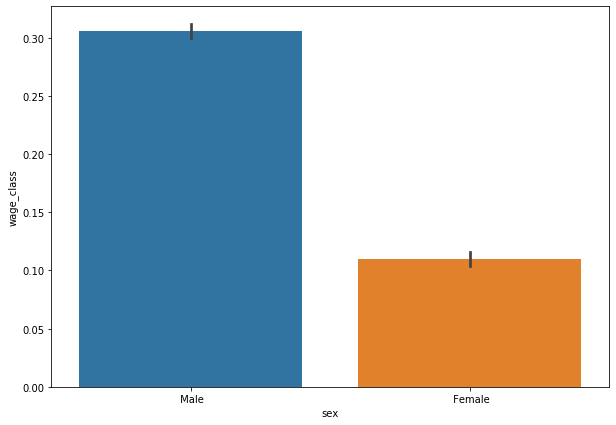

In [424]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
sns.barplot(x='sex' , y ='wage_class', data= train_set)

In [426]:
train_set.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0


In [ ]:
#Now we will handle categorical data using label encoder

In [501]:
from sklearn import preprocessing

categorical_col = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

for feature in categorical_col:
        le = preprocessing.LabelEncoder()
        train_set[feature] = le.fit_transform(train_set[feature])
        #test_set[feature] = le.fit_transform(test_set[feature])

In [438]:
correlation = train_set.corr()
correlation.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
age,1.000000,0.040504,-0.076646,-0.010508,0.036527,-0.266288,0.001739,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000270,0.234037
workclass,0.040504,1.000000,-0.024338,0.004874,0.003536,-0.020468,0.007110,-0.057947,0.048350,0.071584,0.031505,0.002644,0.042199,-0.001625,0.002693
fnlwgt,-0.076646,-0.024338,1.000000,-0.028145,-0.043195,0.028153,0.000188,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.063286,-0.009463
education,-0.010508,0.004874,-0.028145,1.000000,0.359153,-0.038407,-0.041279,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.076060,0.079317
education_num,0.036527,0.003536,-0.043195,0.359153,1.000000,-0.069304,0.070954,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.088894,0.335154


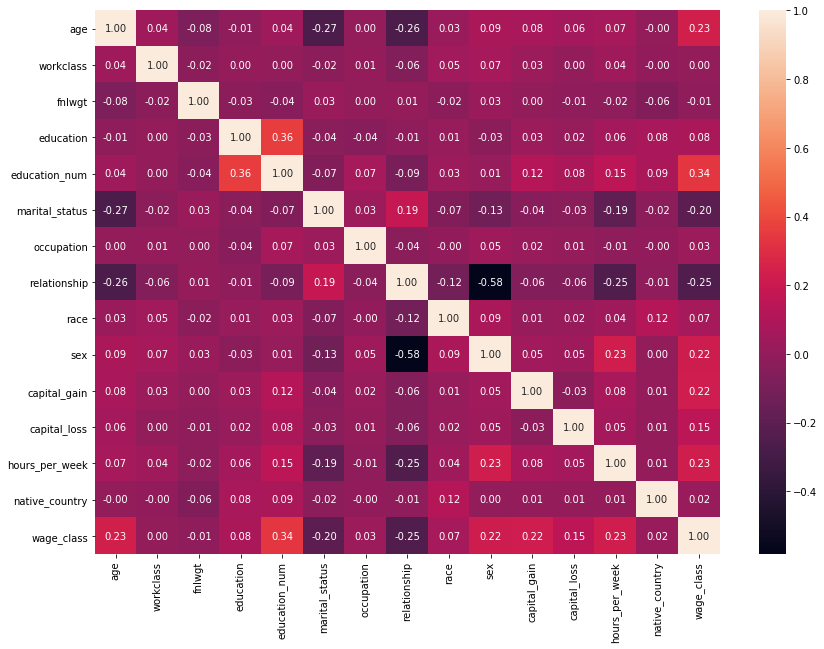

In [441]:
plt.figure(figsize=(14,10))
sns.heatmap(train_set.corr(),annot=True,fmt='.2f')
plt.show()

we can see from the heatmap "education" and "education.num" are highly correlated, same can be said about the "marital.status" and "relationship" ,thus,we can drop "relationship" and "education"

In [504]:
train_set=train_set.drop(['relationship','education'],axis=1)
#test_set=test_set.drop(['relationship','education'],axis=1)

In [506]:
x = train_set.drop(columns='wage_class')
y = train_set['wage_class']

In [507]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(x)

In [508]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_data,y,test_size=0.3,random_state=42)

WE split the data in train test dataset

In [514]:
# fit model no training data
xg_clf = XGBClassifier(learning_rate= 1, max_depth= 5, n_estimators= 50)
xg_clf.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [515]:
y_pred = xg_clf.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8624219469751254

In [518]:
filename = 'xgboost_model.pickle'
pickle.dump(xg_clf, open(filename, 'wb'))
final_model = pickle.load(open(filename, 'rb'))

In [519]:
filename_scaler = 'scaler_model.pickle'
pickle.dump(scaler, open(filename_scaler, 'wb'))
scaler_model = pickle.load(open(filename_scaler, 'rb'))

In [530]:
xg=scaler_model.transform([[52,5,209642,14,2,3,4,1,0,0,45,38]])
pred=final_model.predict(xg)
print('This data belongs to class :',pred[0])
print('Means this person income has greater than 50k')

This data belongs to class : 1
Means this person income has greater than 50k
